<a href="https://colab.research.google.com/github/putribuana/Dicoding-ProyekAkhirAnalisisData/blob/main/notebook_putribuana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike-sharing-dataset
- Nama: Andi Engku Putribuana
- Email: andiengku1922@gmail.com
- Id Dicoding: putribuana

## Menentukan Pertanyaan Bisnis

- Bagaimana cuaca dapat mempengaruhi pengguna bike sharing?

- Apakah musim dapat berpengaruh terhadap pengguna bike sharing?


## Menyiapkan semua library yang dibuthkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [8]:
# Membaca file CSV dari URL github dengan library pandas
day_df = pd.read_csv("https://raw.githubusercontent.com/putribuana/Dicoding-ProyekAkhirAnalisisData/main/BIke-sharing-datasets/day.csv")

# Menampilkan data day di beberapa baris data pertama
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


tabel hour_df

In [7]:
# Membaca file CSV dari URL github dengan library pandas
hour_df = pd.read_csv("https://raw.githubusercontent.com/putribuana/Dicoding-ProyekAkhirAnalisisData/main/BIke-sharing-datasets/day.csv")

# Menampilkan data hour di beberapa baris data pertama
hour_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

####**menilai tabel day_df**

method info() untuk memastikan tipe data di tabel day_df

In [9]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari apa yang terlihat pada tabel day_df, terdapat kesalahan dalam jenis data pada kolom dteday yang semestinya merupakan datetime, bukan objek.

In [10]:
#cek duplikasi
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


jika diperhatikan tidak terdapat duplikasi dan keanehan nilai pada day_df

**mengecek missing value**

In [11]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

berdasarkan pengecekan, data day_df tidak terdapat missing value

**Menilai parameter statistik**

In [12]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


dari pengamtan penilaian parameter statistik, tidak terdapat parameter statistik yang tidak sesuai pada tabel day_df

####**menilai tabel hour_df**

memastikan tipe data hour_df

In [13]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


pada tabel hour_df menunjukkan adanya kesalahan tipe data pada kolom dteday yang seharusnya berupa datetime, namun saat ini berbentuk objek.

In [14]:
#cek duplikasi
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


tidak terdapat duplikasi pada data hour_df

In [15]:
#cek missing value
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

tidak terdapat missing value pada tabel hour_df

In [16]:
#mengecek parameter statistik
hour_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


dari pengamtan penilaian parameter statistik, tidak terdapat parameter statistik yang tidak sesuai pada tabel hour_df

####Rangkuman masalah pada data day_df dan hour_df adalah sebagai berikut :

1) pada tabel day_df, tipe data pada kolom dteday harusnya "datetime" bukan object

2) pada tabel hour_df, tipe data pada kolom dteday harusnya "datetime" bukan object

### Cleaning Data

Membersihkan data tabel day_df (berdasarkan masalah diatas, kita perlu memperbaiki tipe data yang salah)

In [17]:
# mengganti tipe data di kolom dtday menjadi "datetime"
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [18]:
#cek data
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Membersihkan data tabel hour_df (berdasarkan masalah diatas, kita perlu memperbaiki tipe data yang salah)

In [19]:
# mengganti tipe data di kolom dtday menjadi "datetime"
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [20]:
#cek data
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

### Explore data *day_df*

In [22]:
day_df.describe(include="all")

<ipython-input-22-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Dari data diatas, dapat diketaui :

* Data pada kolom "season" memiliki 4 nilai unik yaitu musim semi, musim panas, musim gugur, musim dingin.

* Data pada kolom "yr" menunjukkan tahun 2011 dan tahun 2012.

* Selanjutnya, data pada kolom "mnth" menunjukkan nilai dari 1 hingga 12, yang diasumsikan sebagai bulan.

* Selain itu, terdapat kolom-kolom "holiday", "weekday", dan "workingday" yang merupakan variabel biner, menandakan apakah hari tersebut adalah hari libur, hari kerja, atau hari libur tetapi bukan akhir pekan.

* Pada data pada kolom "weathersit" memiliki 3 nilai unik, yang diasumsikan sebagai kondisi cuaca seperti cerah, berawan, dan hujan.



In [23]:
day_df.loc[day_df["season"] == 1, "season"] = "Springer"
day_df.loc[day_df["season"] == 2, "season"] = "Summer"
day_df.loc[day_df["season"] == 3, "season"] = "Fall"
day_df.loc[day_df["season"] == 4, "season"] = "Winter"

day_df.season.value_counts().sort_index()

Fall        188
Springer    181
Summer      184
Winter      178
Name: season, dtype: int64

In [24]:
#Data pada kolom "yr" menunjukkan biner 0 dan 1 yang diasumsikan menjadi tahun 2011 dan tahun 2012
day_df.loc[day_df["yr"] == 0, "yr"] = "2011"
day_df.loc[day_df["yr"] == 1, "yr"] = "2012"

day_df.yr.value_counts().sort_index()

2011    365
2012    366
Name: yr, dtype: int64

In [25]:
#kolom "mnth" menunjukkan nilai dari 1 hingga 12, yang diasumsikan sebagai bulan.
day_df.mnth.value_counts().sort_index()

1     62
2     57
3     62
4     60
5     62
6     60
7     62
8     62
9     60
10    62
11    60
12    62
Name: mnth, dtype: int64

In [26]:
#kolom-kolom "holiday", "weekday", dan "workingday"
#yang merupakan variabel biner, menandakan apakah hari
#tersebut adalah hari libur,
#hari kerja, atau hari libur tetapi bukan akhir pekan.
day_df.loc[day_df["holiday"] == 0, "holiday"] = "Holiday"
day_df.loc[day_df["holiday"] == 1, "holiday"] = "Not a Holiday"

day_df.holiday.value_counts().sort_index()

Holiday          710
Not a Holiday     21
Name: holiday, dtype: int64

In [27]:
day_df.loc[day_df["weekday"] == 0, "weekday"] = "Sun"
day_df.loc[day_df["weekday"] == 1, "weekday"] = "Mon"
day_df.loc[day_df["weekday"] == 2, "weekday"] = "Tue"
day_df.loc[day_df["weekday"] == 3, "weekday"] = "Wed"
day_df.loc[day_df["weekday"] == 4, "weekday"] = "Thu"
day_df.loc[day_df["weekday"] == 5, "weekday"] = "Fri"
day_df.loc[day_df["weekday"] == 6, "weekday"] = "Sat"

day_df.weekday.value_counts().sort_index()

Fri    104
Mon    105
Sat    105
Sun    105
Thu    104
Tue    104
Wed    104
Name: weekday, dtype: int64

In [28]:
day_df.loc[day_df["workingday"] == 0, "workingday"] = "Holiday"
day_df.loc[day_df["workingday"] == 1, "workingday"] = "Working Day"

day_df.workingday.value_counts().sort_index()

Holiday        231
Working Day    500
Name: workingday, dtype: int64

In [29]:
day_df.loc[day_df["weathersit"] == 1, "weathersit"] = "Clear"
day_df.loc[day_df["weathersit"] == 2, "weathersit"] = "Mist + Cloudy"
day_df.loc[day_df["weathersit"] == 3, "weathersit"] = "Light Snow"
day_df.loc[day_df["weathersit"] == 4, "weathersit"] = "Heavy Rain"

day_df.weathersit.value_counts().sort_index()

Clear            463
Light Snow        21
Mist + Cloudy    247
Name: weathersit, dtype: int64

### Explore data *hour_df*

In [38]:
hour_df.describe(include="all")

<ipython-input-38-55b8ff84265d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Dari data diatas, dapat ditemukan bahwa :

* Top: Nilai yang paling sering muncul dalam setiap kolom. Contohnya, nilai yang paling sering muncul pada kolom "dteday" adalah "2011-01-01 00:00:00".

* Freq : Frekuensi kemunculan dari nilai yang paling sering muncul dalam setiap kolom. Contohnya, nilai "2011-01-01 00:00:00" pada kolom "dteday" muncul 1 kali.

* Mean : Rata-rata nilai dalam setiap kolom numerik. Contohnya, rata-rata dari kolom "yr" adalah 0.500684, yang kemungkinan mengindikasikan bahwa sekitar setengah dari data merujuk ke tahun 2011 dan setengahnya lagi ke tahun 2012.

* Std : Standar deviasi dari nilai dalam setiap kolom numerik. Standar deviasi mengukur seberapa tersebar atau tersebar data dari rata-rata. Semakin tinggi nilai standar deviasi, semakin besar variasi data dari rata-rata.

* "25%", "50%", "75%": Kuartil pertama, kuartil kedua (median), dan kuartil ketiga dari setiap kolom numerik. Kuartil pertama (25%) adalah nilai yang membagi data menjadi 25% terbawah, kuartil kedua (50%) adalah median yang membagi data menjadi 50% terbawah dan 50% teratas, dan kuartil ketiga (75%) membagi data menjadi 75% terbawah dan 25% teratas.

In [40]:
hour_df.loc[hour_df["weathersit"] == 1, "weathersit"] = "Clear"
hour_df.loc[hour_df["weathersit"] == 2, "weathersit"] = "Mist + Cloudy"
hour_df.loc[hour_df["weathersit"] == 3, "weathersit"] = "Light Snow"
hour_df.loc[hour_df["weathersit"] == 4, "weathersit"] = "Heavy Rain"

hour_df.weathersit.value_counts().sort_index()

Clear            463
Light Snow        21
Mist + Cloudy    247
Name: weathersit, dtype: int64

## Visualization & Explanatory Analysis

### Bagaimana cuaca dapat mempengaruhi pengguna bike sharing?

In [43]:
byweathersit_df = day_df.groupby(by="weathersit").instant.nunique().reset_index()
byweathersit_df.rename(columns={
    "instant": "sum"
}, inplace=True)
byweathersit_df

,weathersit,sum
0,Clear,463
1,Light Snow,21
2,Mist + Cloudy,247


import numpy as np
from google.colab import autoviz
df_7391652337255186193 = autoviz.get_df('df_7391652337255186193')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7391652337255186193, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7601916294753019666 = autoviz.get_df('df_7601916294753019666')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7601916294753019666, *['sum'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5375630799599356316 = autoviz.get_df('df_5375630799599356316')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5375630799599356316, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8129095951201575779 = autoviz.get_df('df_8129095951201575779')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8129095951201575779, *['sum'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2810360577377814194 = autoviz.get_df('df_2810360577377814194')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_2810360577377814194, *['weathersit'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3858963077095858372 = autoviz.get_df('df_3858963077095858372')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_3858963077095858372, *[[['index', 'sum']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_7843796164117960992 = autoviz.get_df('df_7843796164117960992')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_7843796164117960992, *['index', 'weathersit'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_8134475037725352190 = autoviz.get_df('df_8134475037725352190')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_8134475037725352190, *['sum', 'weathersit'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_6627164247039488336 = autoviz.get_df('df_6627164247039488336')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6627164247039488336, *['index', 'sum', 'weathersit'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6717569128826557154 = autoviz.get_df('df_6717569128826557154')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6717569128826557154, *['index', 'count()', 'weathersit'], **{})
chart

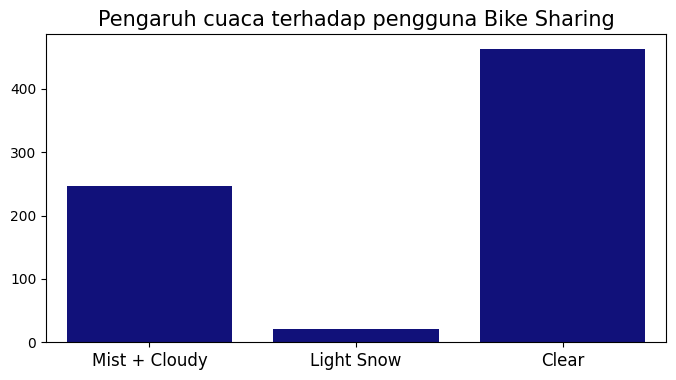

In [55]:
plt.figure(figsize=(8, 4))

# Data dan visualisasi
data = byweathersit_df.sort_values(by="weathersit", ascending=False)
sns.barplot(
    y="sum",
    x="weathersit",
    data=data,
    color="darkblue",
)

plt.title("Pengaruh cuaca terhadap pengguna Bike Sharing", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

### Apakah musim dapat berpengaruh terhadap pengguna bike sharing?

In [48]:
byseason_df = day_df.groupby(by="season").instant.nunique().reset_index()
byseason_df.rename(columns={
    "instant": "sum"
}, inplace=True)
byseason_df

,season,sum
0,Fall,188
1,Springer,181
2,Summer,184
3,Winter,178


import numpy as np
from google.colab import autoviz
df_3039042006946238073 = autoviz.get_df('df_3039042006946238073')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3039042006946238073, *['sum'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3039042006946238073 = autoviz.get_df('df_3039042006946238073')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3039042006946238073, *['sum'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3039042006946238073 = autoviz.get_df('df_3039042006946238073')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_3039042006946238073, *['season'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3039042006946238073 = autoviz.get_df('df_3039042006946238073')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_3039042006946238073, *['sum', 'season'], **{'inner': 'stick'})
chart

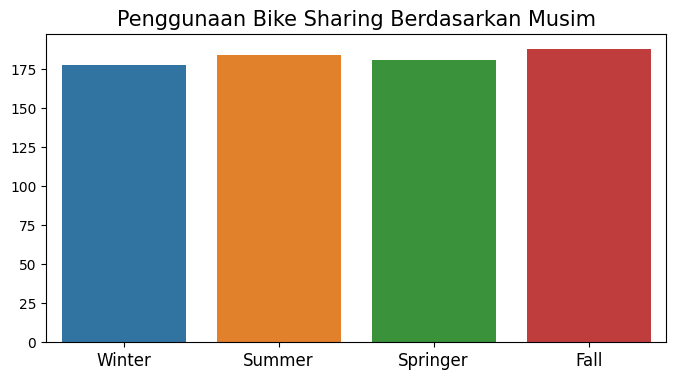

In [54]:
plt.figure(figsize=(8, 4))

sns.barplot(
    y="sum",
    x="season",
    data=byseason_df.sort_values(by="season", ascending=False),
)
plt.title("Penggunaan Bike Sharing Berdasarkan Musim", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

## Conclusion

####Kesimpulan pertanyaan 1
* Grafik batang diatas menunjukkan bahwa penggunaan bike sharing cenderung berkurang pada kondisi cuaca yang lebih buruk (nilai weathersit lebih tinggi). Disisi lain, penggunaan bike sharing cenderung lebih tinggi saat cuaca lebih cerah dan berkurang saat cuaca lebih buruk atau berawan.

####Kesimpulan pertanyaan 2
* Grafik batang diatas menunjukkan bahwa penggunaan bike sharing memiliki variasi yang signifikan terhadap musim yang berbeda. Dengan kata lain, penggunaan bike sharing cenderung lebih tinggi saat musim-musim yang lebih hangat seperti musim semi dan musim panas, dan cenderung menurun selama musim-musim yang lebih dingin seperti musim gugur dan musim dingin.

##Ekspor Dataset

In [58]:
day_df.to_csv("dashboard\day_clean.csv", index=False)